# Tutorial 4: Classification with kNN
[![View notebooks on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/amonroym99/uva-applied-ml/blob/main/docs/notebooks/4_knn_classif.ipynb)

**Author:** Alejandro Monroy

In this tutorial, we shift our focus to the second main problem in supervised learning: classification. The objective is to predict a categorical label ($y$) based on the input features ($X$).

This notebook introduces two fundamental classification models: k-Nearest Neighbors (kNN) and Logistic Regression. Additionally, we will explore key metrics to evaluate the performance of classification models

🤔 _**Food for thought:** While you read this and the next notebooks, try to think about how the models/techniques that we use here compare to the ones we used for regression._

In [1]:
import numpy as np

## 1. Loading and preparing the data

We will use the `wine` dataset from Sklearn, that includes 13 numerical features for wine quality prediction.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [3]:
print(wine.data.shape, wine.target.shape)
X = wine.data
y = wine.target

print("Features of first sample: ", wine.data[0])
print("Label of first sample: ", wine.target[0])

(178, 13) (178,)
Features of first sample:  [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Label of first sample:  0


We have 178 samples in total with 13 numerical features ($X$) and 1 label ($y$) represented with an integer.

The first sample belongs to class `0`. Let's see how many classes there are in total:

In [4]:
print("Classes: ", np.unique(wine.target))

Classes:  [0 1 2]


There are three classes, labeled with the integers `0`, `1` and `2`. Now that we know our dataset, let's split it into a training and test set:

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(142, 13) (142,) (36, 13) (36,)


## 2. K-Nearest Neighbors for classification
The k-Nearest Neighbors (kNN) algorithm, introduced in the second tutorial, can also be applied to classification tasks. While the process of selecting the nearest neighbors remains the same, the method for determining the predicted value differs. In regression, we calculated a (potentially weighted) average of the target values. For classification, however, the predicted label is determined by selecting the most frequent label among the k nearest neighbors.

To get the most frequent label, we will have to compute mode of an array. For this purpose, we will use the `scipy.stats.mode` from the `spacy` library. This function returns a tuple `(mode, count)`, where `mode` is the mode value and `count` is the number of appearances of that value in the array:

In [6]:
from scipy.stats import mode

# Example array
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 4, 4])

mode_val, count = mode(data)

print("Mode:", mode_val)
print("Number of appearances:", count)

Mode: 4
Number of appearances: 4


If we are only interested in the mode value, we can directly index on the output of the function.

In [7]:
print("Mode:", mode(data)[0])

Mode: 4


Now, let's define our `KNeighborsClassifier` class. The logic is similar to that of the regressor; however, instead of returning the average of the neighbors' target values, we will return the most frequent label (the mode) among the neighbors:

In [8]:
class KNeighborsClassifier:
    """
    K-Nearest Neighbors classifier.
    """

    def __init__(self, n_neighbors=5):
        """
        Initializes the KNeighborsClassifier with the specified number of neighbors.

        Args:
            n_neighbors (int): Number of neighbors to use for prediction. Default is 5.
        """
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Fit the KNN classifier on the training data.

        Args:
            X (np.ndarray): Training data features.
            y (np.ndarray): Training data labels.
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """
        Predict the target for the given data.

        Args:
            X (np.ndarray): Data to predict.

        Returns:
            np.ndarray: Predicted target values.
        """
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_values = self.y_train[k_indices]
            prediction = mode(k_nearest_values)[0]
            predictions.append(prediction)
        return np.array(predictions)
    
# Sample usage
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
print("First 10 predicted labels:", y_pred[:10])
print("First 10 true labels:", y_test[:10])


First 10 predicted labels: [0 2 0 1 2 0 0 1 2 2]
First 10 true labels: [0 2 0 1 1 0 0 1 1 2]


As a sanity check, let's compare our implementation with the one from Sklearn:

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier_sklearn = KNeighborsClassifier(n_neighbors=5)
knn_classifier_sklearn.fit(X_train, y_train)
y_pred_sklearn = knn_classifier.predict(X_test)

print("First 10 predicted labels:", y_pred[:10])
print("First 10 true labels:", y_test[:10])
assert all(y_pred_sklearn == y_pred)

First 10 predicted labels: [0 2 0 1 2 0 0 1 2 2]
First 10 true labels: [0 2 0 1 1 0 0 1 1 2]


## 3. Evaluating classification models 
Evaluating a classification model involves measuring how well the predicted labels match the ground truth on the test data. This is typically done using metrics like accuracy, precision, recall, and F1 score.

### 3.1. Binary classification

Let's start with the binary case, i.e. a classification problem where there are only 2 labels: _Positive_ (`1`) and _Negative_ (`0`).

We can easily compare the predicted and true labels using a **confusion matrix**:

  $$
  \begin{array}{|c|c|c|}
  \hline
  & \text{Predicted Positive} & \text{Predicted Negative} \\
  \hline
  \text{Actual Positive} & TP & FN \\
  \hline
  \text{Actual Negative} & FP & TN \\
  \hline
  \end{array}
  $$

  where:
  
  - $TP$ = True Positives (samples that are predicted as positive and are actually positive).
  - $TN$ = True Negatives (samples that are predicted as negative and are actually negative).
  - $FP$ = False Positives (samples that are predicted as positive but are actually negative).
  - $FN$ = False Negatives (samples that are predicted as negative but are actually positive).

❗️ _**Note:** You might encounter other resources that define the confusion matrix with the actual labels on the columns and the predicted labels on the rows. Both conventions are valid, but it's important to be consistent with the one you choose. In this course, we will adhere to the convention where the actual labels are on the rows and the predicted labels are on the columns, which aligns with how Sklearn computes it._

We can get the confusion matrix given the lists of true and predicted labels using Sklearn:

In [10]:
from sklearn.metrics import confusion_matrix

# Example true labels and predicted labels for binary classification
true_labels = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0])
predicted_labels = np.array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1])

conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[8 2]
 [3 7]]


And we can plot it nicely using Matplotlib and Seaborn:

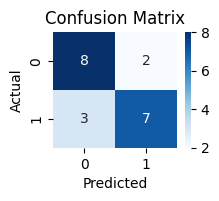

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(2, 1.5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We can now define some metrics based on the values on the confusion matrix:

- **Accuracy**: The ratio of correctly predicted samples to the total instances.
  $$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$


- **Precision**: The ratio of correctly predicted positive samples to the total predicted positives.
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

- **Recall**: The ratio of correctly predicted positive samples to all observations in the actual class.
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

- **F1 Score**: The harmonic mean of Precision and Recall. It is especially useful when the class distribution is imbalanced.
  $$
  \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", "{:.4f}".format(accuracy))

precision = precision_score(true_labels, predicted_labels)
print("Precision:", "{:.4f}".format(precision))

recall = recall_score(true_labels, predicted_labels)
print("Recall:", "{:.4f}".format(recall))

f1 = f1_score(true_labels, predicted_labels)
print("F1 Score:", "{:.4f}".format(f1))

Accuracy: 0.7500
Precision: 0.7778
Recall: 0.7000
F1 Score: 0.7368


🤔 _**Food for thought:** Pay attention to the order of the arguments in the functions that we are using. Note that the true labels go first and the predicted ones go second. Swapping the order would give you a different result for all 4 metrics except for one of them. Can you tell which one?_ 

Each metric highlights a different aspect of model performance, helping to evaluate the trade-offs between false positives and false negatives. It is important to know which metrics we should pay more attention to depending of the nature of our problem.

**Accuracy** measures the overall correctness of the model by calculating the ratio of correctly predicted samples to the total number of samples, but it can be misleading when there is class imbalance. **Precision** focuses on the quality of positive predictions, making it crucial when false positives are costly (for example, in spam detection, where marking a legitimate email as spam can cause inconvenience). **Recall**, on the other hand, measures the model's ability to identify all positive samples, which is important when false negatives are costly (for example, in a medical test, failing to identify a patient with a disease could have severe consequences). F1 Score combines precision and recall into a single metric using their harmonic mean, providing a balanced measure of both.


### 3.2. Extension to the multiclass case

In the multiclass case, the confusion matrix is a $K\times K$ matrix, where $K$ is the number of classes. Each cell $(i, j)$ in the matrix represents the number of instances of class $i$ that were predicted as class $j$.

For example, for a 3-class classification problem, the confusion matrix would look like this:

$$
\begin{array}{|c|c|c|c|}
\hline
 & \text{Predicted Class 0} & \text{Predicted Class 1} & \text{Predicted Class 2} \\
\hline
\text{Actual Class 0} & n_{00} & n_{01} & n_{02} \\
\hline
\text{Actual Class 1} & n_{10} & n_{11} & n_{12} \\
\hline
\text{Actual Class 2} & n_{20} & n_{21} & n_{22} \\
\hline
\end{array}
$$

Where $n_{ij}$ is the number of instances of class $i$ that were predicted as class $j$.

The metrics we defined for binary classification can be extended to the multiclass case as follows:

- **Accuracy**: The ratio of correctly predicted samples to the total instances.
    $$
    \text{Accuracy} = \frac{\text{\#correctly predicted samples}}{\text{\#total samples}} = \frac{\sum_{i=0}^{C-1} n_{ii}}{\sum_{i=0}^{C-1} \sum_{j=0}^{C-1} n_{ij}}.
    $$

- **Precision**: The ratio of correctly predicted samples of a class to the total predicted samples of that class. For class $i$:
    $$
    \text{Precision}_i = \frac{TP_i}{TP_i+FP_i} = \frac{n_{ii}}{\sum_{j=0}^{C-1} n_{ji}}.
    $$

- **Recall**: The ratio of correctly predicted samples of a class to all observations in the actual class. For class $i$:
    $$
    \text{Recall}_i = \frac{TP_i}{TP_i+FN_i} = \frac{n_{ii}}{\sum_{j=0}^{C-1} n_{ij}}.
    $$

- **F1 Score**: The harmonic mean of Precision and Recall for each class $i$:
    $$
    \text{F1 Score}_i = 2 \cdot \frac{\text{Precision}_i \cdot \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i}.
    $$


Note that now we compute Precision, Recall and F1-Score at class level. This allows us to analyze how well the model is performing in each class separately. 

To get a single value for precision, recall, and F1 score across all classes, we can use:
- **Macro averaging**: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
- **Micro averaging**: Calculate metrics globally by counting the total true positives, false negatives and false positives.
- **Weighted averaging**: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).

Let's evaluate the kNN classifier on the wine dataset:

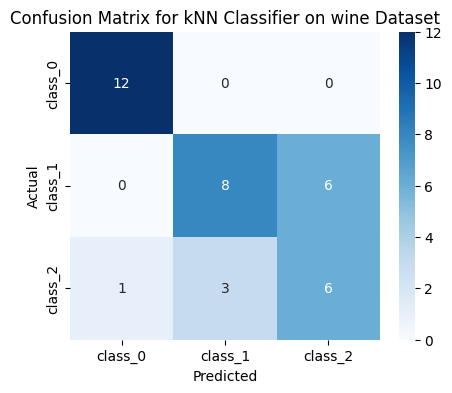

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for kNN Classifier on wine Dataset')
plt.show()

Ideally, we would like the elements in the diagonal (true positives) to be as high as possible, and the elements outside the diagonal to be as low as possible. In this case, we observe only a few errors, especially in classes 1 and 2.

Let's compute some metrics. The accuracy is:

In [14]:
print("Accuracy:", "{:.4f}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.7222


Let's now compute the precision, for example. As there are more than two classes, we need to specify how to aggregate the metrics for different classes with the `average` attribute (or set it to `None` to get the metric for each class):

In [15]:
print("Precision per class: ", precision_score(y_test, y_pred, average=None))


Precision per class:  [0.92307692 0.72727273 0.5       ]


For example, for `class_0` there are 12 True Positives and 1 False Positive, so the precision is $\frac{12}{12+1} \sim 0.9231$. Let's now compute the aggregated metrics with the different strategies:

In [16]:
print("Precision (macro): ", "{:.4f}".format(precision_score(y_test, y_pred, average="macro")))
print("Precision (micro): ", "{:.4f}".format(precision_score(y_test, y_pred, average="micro")))
print("Precision (weighted): ", "{:.4f}".format(precision_score(y_test, y_pred, average="weighted")))

Precision (macro):  0.7168
Precision (micro):  0.7222
Precision (weighted):  0.7294


There is also a very nice function in Sklearn that gives us a summary of all these classification metrics:

In [17]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=wine.target_names)
print(accuracy_score(y_test, y_pred))
print("Classification Report:")
print(report)

0.7222222222222222
Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       0.73      0.57      0.64        14
     class_2       0.50      0.60      0.55        10

    accuracy                           0.72        36
   macro avg       0.72      0.72      0.72        36
weighted avg       0.73      0.72      0.72        36



Here we observe more clearly that the model performs significantly better for `class_0` than for the other two classes. For `class_1` and `class_2`, the metrics are lower and there is a noticeable difference between precision and recall, especially in `class_1`, where the model is only able to identify 57% of the positive samples.